<a href="https://colab.research.google.com/github/IrisMon/BeginnerMachineLearning/blob/main/LinearDiscriminant_Analysis_In_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Análisis discriminante lineal**

Es una técnica utilizada para reducir dimensionalidad

In [2]:
## Importamos librerias necesarias
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
np.set_printoptions(precision=4)
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [16]:
## Importamos base desde la libreria
wine = load_wine()
##Covertimos a dataframe para explorar que datos tiene la data
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Categorical.from_codes(wine.target, wine.target_names)


In [17]:
X.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0


In [25]:
### Vemos cuantas columnas contiene
X.shape

(178, 13)

In [26]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [33]:
## Juntamos las variables independientes con las variables dependientes
data = X.join(pd.Series(y, name='class'))

In [34]:
data.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0


In [44]:
data.columns


Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'class'],
      dtype='object')

In [56]:
## Creamos un objeto con los nombres del tipo o clase de vino
class_feature_means = pd.DataFrame(columns=wine.target_names)

for c, rows in df.groupby('class'): ### Cada clase
    class_feature_means[c] = rows.mean() ### Calculamos la media
class_feature_means ## Observamos el resultado final agrupado por clase

,class_0,class_1,class_2
alcohol,13.744746,12.278732,13.153750
malic_acid,2.010678,1.932676,3.333750
ash,2.455593,2.244789,2.437083
alcalinity_of_ash,17.037288,20.238028,21.416667
magnesium,106.338983,94.549296,99.312500
total_phenols,2.840169,2.258873,1.678750
flavanoids,2.982373,2.080845,0.781458
nonflavanoid_phenols,0.290000,0.363662,0.447500
proanthocyanins,1.899322,1.630282,1.153542
color_intensity,5.528305,3.086620,7.396250


In [48]:
###Otro metodo
Resumen=data.pivot_table(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
               ['class'], aggfunc='mean')

In [54]:
### Convertimos columnas a filas
Resumen.T

class,class_0,class_1,class_2
alcalinity_of_ash,17.037288,20.238028,21.416667
alcohol,13.744746,12.278732,13.153750
ash,2.455593,2.244789,2.437083
color_intensity,5.528305,3.086620,7.396250
flavanoids,2.982373,2.080845,0.781458
hue,1.062034,1.056282,0.682708
magnesium,106.338983,94.549296,99.312500
malic_acid,2.010678,1.932676,3.333750
nonflavanoid_phenols,0.290000,0.363662,0.447500
od280/od315_of_diluted_wines,3.157797,2.785352,1.683542


In [57]:
rows.drop(['class'], axis=1)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
130,12.86,1.35,2.32,18.0,122.0,1.51,1.25,0.21,0.94,4.100000,0.76,1.29,630.0
131,12.88,2.99,2.40,20.0,104.0,1.30,1.22,0.24,0.83,5.400000,0.74,1.42,530.0
132,12.81,2.31,2.40,24.0,98.0,1.15,1.09,0.27,0.83,5.700000,0.66,1.36,560.0
133,12.70,3.55,2.36,21.5,106.0,1.70,1.20,0.17,0.84,5.000000,0.78,1.29,600.0
134,12.51,1.24,2.25,17.5,85.0,2.00,0.58,0.60,1.25,5.450000,0.75,1.51,650.0
135,12.60,2.46,2.20,18.5,94.0,1.62,0.66,0.63,0.94,7.100000,0.73,1.58,695.0
136,12.25,4.72,2.54,21.0,89.0,1.38,0.47,0.53,0.80,3.850000,0.75,1.27,720.0
137,12.53,5.51,2.64,25.0,96.0,1.79,0.60,0.63,1.10,5.000000,0.82,1.69,515.0
138,13.49,3.59,2.19,19.5,88.0,1.62,0.48,0.58,0.88,5.700000,0.81,1.82,580.0
139,12.84,2.96,2.61,24.0,101.0,2.32,0.60,0.53,0.81,4.920000,0.89,2.15,590.0


In [61]:
within_class_scatter_matrix = np.zeros((13,13))
for c, rows in df.groupby('class'):
  rows = rows.drop(['class'], axis=1)
  s = np.zeros((13,13))
for index, row in rows.iterrows():
  x, mc = row.values.reshape(13,1), class_feature_means[c].values.reshape(13,1)
  s += (x - mc).dot((x - mc).T)
  within_class_scatter_matrix += s

In [62]:
feature_means = df.mean()
between_class_scatter_matrix = np.zeros((13,13))
for c in class_feature_means:    
    n = len(df.loc[df['class'] == c].index)
    
    mc, m = class_feature_means[c].values.reshape(13,1), feature_means.values.reshape(13,1)
    
    between_class_scatter_matrix += n * (mc - m).dot((mc - m).T)

In [63]:
eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(within_class_scatter_matrix).dot(between_class_scatter_matrix))

In [64]:
pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
pairs = sorted(pairs, key=lambda x: x[0], reverse=True)
for pair in pairs:
    print(pair[0])

9.884546449232964
2.9033610617160606
6.285916968291436e-16
6.285916968291436e-16
5.979482586809227e-16
5.345289989557e-16
5.345289989557e-16
2.5624197998855253e-16
2.5624197998855253e-16
2.4778227778444637e-16
5.049704088349899e-17
1.0023889228649853e-17
0.0


In [65]:
eigen_value_sums = sum(eigen_values)
print('Explained Variance')
for i, pair in enumerate(pairs):
    print('Eigenvector {}: {}'.format(i, (pair[0]/eigen_value_sums).real))

Explained Variance
Eigenvector 0: 0.772960426932225
Eigenvector 1: 0.22703957306777506
Eigenvector 2: 4.915516446228146e-17
Eigenvector 3: 4.915516446228146e-17
Eigenvector 4: 4.6758882027333914e-17
Eigenvector 5: 4.179956716906465e-17
Eigenvector 6: 4.179956716906465e-17
Eigenvector 7: 2.0037834944392412e-17
Eigenvector 8: 2.0037834944392412e-17
Eigenvector 9: 1.9376295736600758e-17
Eigenvector 10: 3.948811863102963e-18
Eigenvector 11: 7.838568757294643e-19
Eigenvector 12: 0.0


In [66]:
w_matrix = np.hstack((pairs[0][1].reshape(13,1), pairs[1][1].reshape(13,1))).real

In [67]:
X_lda = np.array(X.dot(w_matrix))

In [68]:
le = LabelEncoder()
y = le.fit_transform(df['class'])

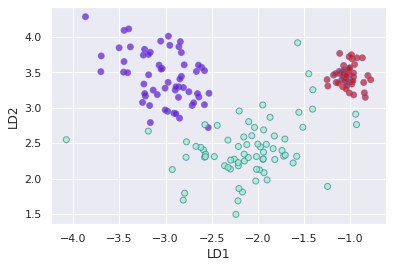

In [69]:
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

In [70]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, y)

In [71]:
lda.explained_variance_ratio_

array([0.6875, 0.3125])

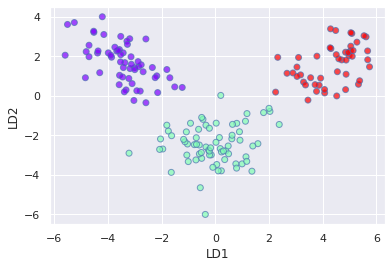

In [72]:
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

In [73]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X, y)

In [74]:
pca.explained_variance_ratio_

array([0.9981, 0.0017])

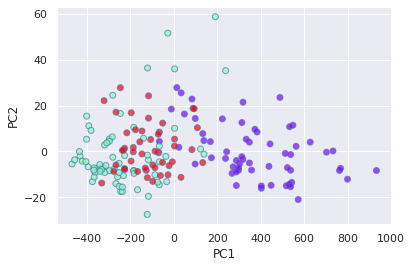

In [75]:
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(
    X_pca[:,0],
    X_pca[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, random_state=1)

In [77]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[18,  0,  0],
       [ 0, 17,  0],
       [ 0,  0, 10]])